In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
ls data\

 Volume in drive D has no label.
 Volume Serial Number is E8EB-BD0B

 Directory of d:\program files\Machine Learning\GenderRecognition\data

28-03-2020  08:25    <DIR>          .
09-04-2024  10:42    <DIR>          ..
28-03-2020  00:04    <DIR>          female
28-03-2020  00:05    <DIR>          male
14-01-2020  22:16            25,144 male_000281.jpg
22-03-2020  10:39         5,908,737 video.mp4
               2 File(s)      5,933,881 bytes
               4 Dir(s)  174,853,349,376 bytes free


In [9]:
from glob import glob

In [10]:
femalepath = glob('./data/female/*.jpg')
malepath = glob('./data/male/*.jpg')

In [11]:
len(femalepath), len(malepath)

(6999, 7000)

In [12]:
# let us consider one image
path = femalepath[0]
img = cv2.imread(path)

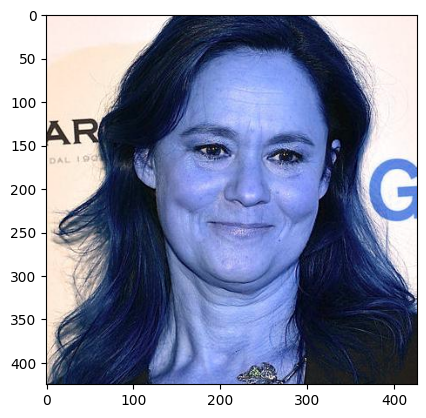

In [13]:
plt.imshow(img)
plt.show()

In [14]:
# convert image into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(425, 426)

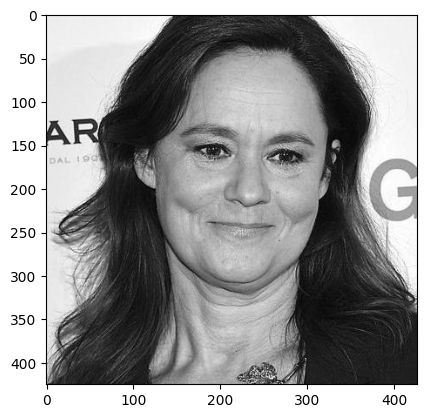

In [15]:
plt.imshow(gray,cmap='gray')

In [16]:
# load haar cascade classifier
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')

In [17]:
faces = haar.detectMultiScale(gray,1.5,5)
print(faces)

[[ 91  46 273 273]
 [142  91 182 182]]


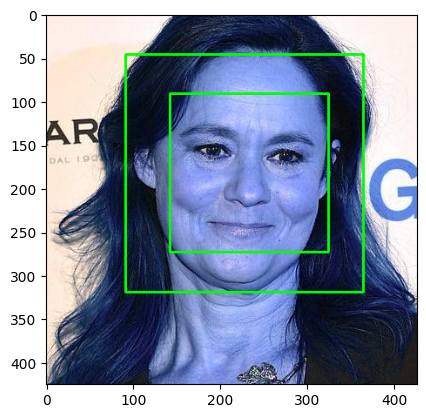

In [18]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [19]:
# crop the image
crop_img = img[y:y+h,x:x+h]

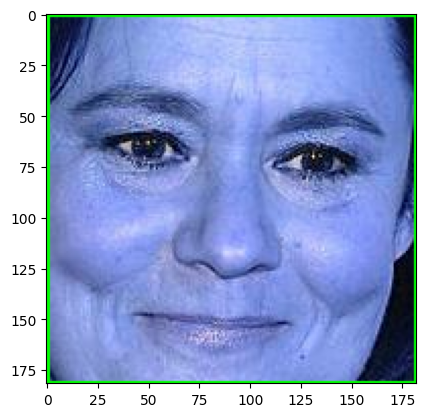

In [20]:
plt.imshow(crop_img)

In [21]:
# save the image
cv2.imwrite('f_01.png',crop_img)

True

In [22]:
# Apply to all the images
def extract_images(path,gender,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
        if gender == 'male':
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender,i),roi)

In [23]:
extract_images(femalepath[0],'female',1)

In [24]:
for i,path in enumerate(femalepath):
    try:

        extract_images(path,'female',i)
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(femalepath)))

In [25]:
for i,path in enumerate(malepath):
    try:

        extract_images(path,'male',i)
        
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(malepath)))